### **JPMorgan Chase & Co - Quantitative Research**
### Task Three - Analyse a book of loans to estimate a customer's probability of default
---

We are given data on loan borrowers. Each row corresponds to data on one customer. Given the relevant data for any customer, we must use this data set to predict the probability that the borrower will default.

In [8]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [9]:
# Import data
Loans_df = pd.read_csv("Loan_Data.csv")

Let us take a view of the type of data given.

In [12]:
Loans_df.head()

customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0

Our first goal is to understand relationships between different variables of the dataset.

# Exploratory Data Analysis

Let us compare the FICO score of customers who have not defaulted with the FICO scores of those that have defaulted on a dual histogram. Firstly, we show the FICO score of all customers in the sample data.

Text(0.5, 0, 'FICO')

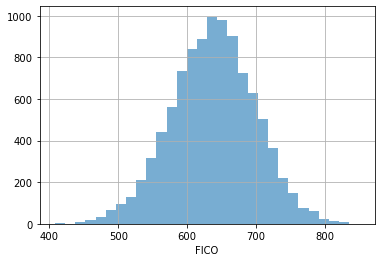

In [13]:
Loans_df['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
plt.xlabel('FICO')

This tells us most people have a FICO score between $600$ and $700$ and a few customers have either a very high FICO score or a very low FICO score. So our dataset is what we expect it to appear like.

Text(0.5, 0, 'FICO')

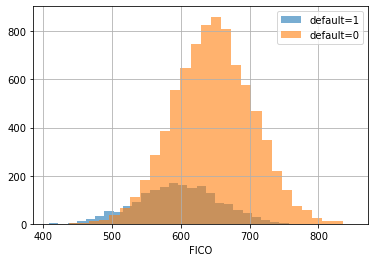

In [15]:
Loans_df[Loans_df['default']==1]['fico_score'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['fico_score'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('FICO')

Let us also take a look at the income of people who have defaulted against those that have not. (Again using a dual histogram)

Text(0.5, 0, 'income')

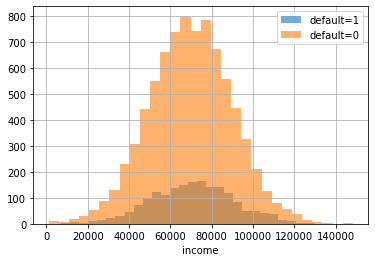

In [16]:
Loans_df[Loans_df['default']==1]['income'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['income'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('income')

And for loan amount outstanding, we have the following comparative graph

Text(0.5, 0, 'loan_amt_outstanding')

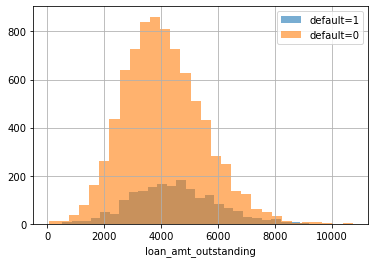

In [17]:
Loans_df[Loans_df['default']==1]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=1')
Loans_df[Loans_df['default']==0]['loan_amt_outstanding'].hist(bins=30,alpha=0.6,label='default=0')
plt.legend()
plt.xlabel('loan_amt_outstanding')

Having understood relationships between different variables, we can now try creating a model.

# Create predictions of probability for loan status using test data

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import pandas as pd

We now read the data again

In [33]:
df = pd.read_csv('Loan_Data.csv')

We define our variables of interest

In [34]:
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

We compute some useful ratios between variables

In [35]:
# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']
    
# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']


We use a Logistic Regression to combine a number of independent variables as defined in *features* to determine a specific outcome, specifically the probability of this customer defaulting. 

In [54]:
clf = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000).fit(df[features], df['default'])
print(clf.coef_, clf.intercept_)

[[ 8.18520373  0.54490854  0.01994244 -2.77630853 -0.02418391]] [-0.09162643]


We can now apply this model to the *features* to predict whether a customer defaults and then compare it to the true values to see our error. We compute the mean squared error between the true and predicted results.

In [52]:
# Use the following code to check yourself
y_pred = clf.predict(df[features])
print((1.0*(abs(df['default']-y_pred)**2).sum()) / len(df))

0.0037


The following metric shows from a scale $[0, 1]$ how close our prediction is to the true data. We see a success rate of $99.2\%$.

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(df['default'], y_pred)
print(metrics.auc(fpr, tpr))

0.9925106069101026
